# CMSC478 Machine Learning - Spring 2021</font>

## Instructor: Fereydoon Vafaei

## <font color="blue">Assignment-4: Multi-Class Classification and Regression with Neural Networks</font>

Sam Bailor - VK96692

## Overview and Learning Objectives

In Assignment-4, you're going to perform multi-class classification and regression using Neural Networks in Tensorflow/Keras.

Pedagogically, this assignment will help you:
- better understand how neural networks are built and applied on ML tasks - specifically multi-class classification and regression.
- practice NN implementation using Tensorflow 2 and Keras Sequential API.

<b>Course Policy Reminder</b>
Debugging the codes and error resolution are always the students' responsbility. This policy will be enforced in email communications and the office hours. Keep in mind that all assignments are individual graded tasks. Any collaboration with other students is strictly prohibited and is considered as cheating. Students should NOT share any answer, solution, or code with other students. Violations of these policies would be penalized according to UMBC academic integrity policy.

**You must run ALL cells** and get the correct outputs for all cells and give complete answers to all questions. **Cells/codes with no output get zero!**

Follow the instructions for each step very carefully.

Wherever needed, you should replace `...` elipsis with your code.

`...` may indicate one or more lines of missing codes. Some outputs are provided to you to use as reference and to verify that your output is correct.

**Preprocessing Effect on Grade**: Preprocessing steps are so critical in each part and you should pay special attention to make sure that you do all preprocessing steps correctly. That is why the reference outputs have been provided in preprocessing steps. Even though preprocessing steps have no direct positive points themselves, they have negative impact if you make mistakes in preprocessing, and your notebook would become unqualified for grading implementation due to wrong results/outputs, and consequently you may get zero for that part of the assignment. 

### Import Cell

The first step is importing all necessary python, sklearn and Tensorflow/Keras modules. **You definitely need to add to the imports as you work on the assignment.** When you import a new module, add it here in the same cell. All imports should be in this import cell.

In [1]:
''' Import Cell
    Import necessary Python/Sklearn modules as well as Tensorflow/Keras '''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.4.1'

In [3]:
# There should be no error/output after running this cell if the installation is correct
tf.debugging.Assert(tf.__version__ >= '2.0.0', ["You should install Tensorflow 2.x"])

In [4]:
keras.__version__

'2.4.0'

## Part-I - Multi-Class Classification Using NN

In Part-I, you're going to use tf/keras to build a NN for multi-class classification.

First download the dataset `Sensorless_drive_diagnosis.txt` from [UCI ML Repository page](https://archive.ics.uci.edu/ml/datasets/Dataset+for+Sensorless+Drive+Diagnosis#). The dataset file is in the `Data Folder`.

"Features are extracted from motor current. The motor has intact and defective components. This results in 11 different classes with different conditions." You're going to predict these 11 classes. Therefore, this is a multi-class classification problem.

Load the text file using pandas `read_csv` considering that the separator is a space `' '`  and the file has no header.

In [5]:
data1 = pd.read_csv('Sensorless_drive_diagnosis.txt', ' ', header=None)
print(data1.shape)
data1.head(3)

(58509, 49)


,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,-3.014600e-07,0.000008,-0.000012,-0.000002,-0.000001,-0.000021,0.031718,0.03171,0.031721,-0.032963,...,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.4996,-1.4996,1
1,2.913200e-06,-0.000005,0.000003,-0.000006,0.000003,-0.000004,0.030804,0.03081,0.030806,-0.033520,...,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005,1
2,-2.951700e-06,-0.000003,-0.000016,-0.000001,-0.000002,0.000017,0.032877,0.03288,0.032896,-0.029834,...,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.4985,-1.4985,1


### Preprocessing

Since the file has no header, column names are integers from 0 to 48, and the last column is the target class. Name the columns from `col1` to `col49` as specified in the provided output.

In [6]:
headers = []
for i in range(49):
    headers.append('col' + str(i+1))
    
data1.columns = headers

data1.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49
0,-3.014600e-07,8.260300e-06,-0.000012,-0.000002,-1.438600e-06,-0.000021,0.031718,0.031710,0.031721,-0.032963,...,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.4996,-1.4996,1
1,2.913200e-06,-5.247700e-06,0.000003,-0.000006,2.778900e-06,-0.000004,0.030804,0.030810,0.030806,-0.033520,...,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005,1
2,-2.951700e-06,-3.184000e-06,-0.000016,-0.000001,-1.575300e-06,0.000017,0.032877,0.032880,0.032896,-0.029834,...,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.4985,-1.4985,1
3,-1.322600e-06,8.820100e-06,-0.000016,-0.000005,-7.282900e-07,0.000004,0.029410,0.029401,0.029417,-0.030156,...,-0.62289,6.5534,6.2606,-1.4963,-1.4963,-1.4963,-1.4975,-1.4975,-1.4976,1
4,-6.836600e-08,5.666300e-07,-0.000026,-0.000006,-7.940600e-07,0.000013,0.030119,0.030119,0.030145,-0.031393,...,-0.63010,4.5155,9.5231,-1.4958,-1.4958,-1.4958,-1.4959,-1.4959,-1.4959,1


> Rename the last column, i.e. the target column, from `col49` to `class`.

In [7]:
data1.rename(columns={'col49':'class'}, inplace=True)
data1.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col40,col41,col42,col43,col44,col45,col46,col47,col48,class
0,-3.014600e-07,8.260300e-06,-0.000012,-0.000002,-1.438600e-06,-0.000021,0.031718,0.031710,0.031721,-0.032963,...,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.4996,-1.4996,1
1,2.913200e-06,-5.247700e-06,0.000003,-0.000006,2.778900e-06,-0.000004,0.030804,0.030810,0.030806,-0.033520,...,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005,1
2,-2.951700e-06,-3.184000e-06,-0.000016,-0.000001,-1.575300e-06,0.000017,0.032877,0.032880,0.032896,-0.029834,...,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.4985,-1.4985,1
3,-1.322600e-06,8.820100e-06,-0.000016,-0.000005,-7.282900e-07,0.000004,0.029410,0.029401,0.029417,-0.030156,...,-0.62289,6.5534,6.2606,-1.4963,-1.4963,-1.4963,-1.4975,-1.4975,-1.4976,1
4,-6.836600e-08,5.666300e-07,-0.000026,-0.000006,-7.940600e-07,0.000013,0.030119,0.030119,0.030145,-0.031393,...,-0.63010,4.5155,9.5231,-1.4958,-1.4958,-1.4958,-1.4959,-1.4959,-1.4959,1


> There are 11 different classes.

In [8]:
data1['class'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

> The dataset is balanced with respect to 11 classes.

In [9]:
data1.groupby('class').size()

class
1     5319
2     5319
3     5319
4     5319
5     5319
6     5319
7     5319
8     5319
9     5319
10    5319
11    5319
dtype: int64

In [10]:
# Check for NAs, and drop NAs if there is any
data1.isna().sum()

col1     0
col2     0
col3     0
col4     0
col5     0
col6     0
col7     0
col8     0
col9     0
col10    0
col11    0
col12    0
col13    0
col14    0
col15    0
col16    0
col17    0
col18    0
col19    0
col20    0
col21    0
col22    0
col23    0
col24    0
col25    0
col26    0
col27    0
col28    0
col29    0
col30    0
col31    0
col32    0
col33    0
col34    0
col35    0
col36    0
col37    0
col38    0
col39    0
col40    0
col41    0
col42    0
col43    0
col44    0
col45    0
col46    0
col47    0
col48    0
class    0
dtype: int64

> Separate features from the target column, so `X` should contain all feature columns `col1` to `col48` and of course should NOT include `class`. `y` should contain `class` only.

In [11]:
X = data1.iloc[:,0:48]
y = data1['class']
print(X.shape)
print(y.shape)

(58509, 48)
(58509,)


In [12]:
# Statistical description of the features
X.describe()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48
count,58509.000000,5.850900e+04,5.850900e+04,58509.000000,5.850900e+04,5.850900e+04,58509.000000,58509.000000,58509.000000,58509.000000,...,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000
mean,-0.000003,1.439648e-06,1.412013e-06,-0.000001,1.351239e-06,-2.654483e-07,0.001915,0.001913,0.001912,-0.011897,...,8.406765,-0.397757,7.293781,8.273772,-1.500887,-1.500912,-1.500805,-1.497771,-1.497794,-1.497686
std,0.000072,5.555429e-05,2.353009e-04,0.000063,5.660943e-05,2.261907e-04,0.036468,0.036465,0.036470,0.066482,...,6.897301,25.018728,12.451781,6.565952,0.003657,0.003668,0.003632,0.003163,0.003163,0.003175
min,-0.013721,-5.414400e-03,-1.358000e-02,-0.012787,-8.355900e-03,-9.741300e-03,-0.139890,-0.135940,-0.130860,-0.218640,...,0.522180,-0.902350,-0.596830,0.320660,-1.525500,-1.526200,-1.523700,-1.521400,-1.523200,-1.521300
25%,-0.000007,-1.444400e-05,-7.239600e-05,-0.000005,-1.475300e-05,-7.379100e-05,-0.019927,-0.019951,-0.019925,-0.032144,...,4.451300,-0.715470,1.450300,4.436300,-1.503300,-1.503400,-1.503200,-1.499600,-1.499600,-1.499500
50%,-0.000003,8.804600e-07,5.137700e-07,-0.000001,7.540200e-07,-1.659300e-07,0.013226,0.013230,0.013247,-0.015566,...,6.566800,-0.661710,3.301300,6.479100,-1.500300,-1.500300,-1.500300,-1.498100,-1.498100,-1.498000
75%,0.000002,1.877700e-05,7.520000e-05,0.000004,1.906200e-05,7.138600e-05,0.024770,0.024776,0.024777,0.020614,...,9.952600,-0.573980,8.288500,9.857500,-1.498200,-1.498200,-1.498200,-1.496200,-1.496300,-1.496200
max,0.005784,4.525300e-03,5.237700e-03,0.001453,8.245100e-04,2.753600e-03,0.069125,0.069130,0.069131,0.352580,...,265.330000,3670.800000,889.930000,153.150000,-1.457600,-1.456100,-1.455500,-1.337200,-1.337200,-1.337100


> Statistical description of the features reveals that they have different scales, so you need to normalize `X`.

> Use [`MinMaxScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to normalize X to the range (0,1) which is the default range.

In [13]:
# Use MinMaxScaler() to normalize X features within the range (0,1) with 0 as minimum and 1 as maximum
X.values[:] = MinMaxScaler().fit_transform(X)
X.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48
0,0.703460,0.545556,0.721049,0.897795,0.910031,0.777923,0.821032,0.817526,0.812942,0.325053,...,0.020749,0.000073,0.003999,0.051032,0.432990,0.429387,0.404692,0.118350,0.126882,0.117807
1,0.703624,0.544197,0.721839,0.897532,0.910491,0.779322,0.816659,0.813137,0.808366,0.324078,...,0.011641,0.000084,0.009233,0.038267,0.424153,0.420827,0.395894,0.113464,0.122043,0.112921
2,0.703324,0.544404,0.720815,0.897872,0.910017,0.781014,0.826577,0.823231,0.818817,0.330531,...,0.019933,0.000073,0.003790,0.032592,0.400589,0.398003,0.373900,0.124321,0.132796,0.123779
3,0.703407,0.545612,0.720817,0.897619,0.910109,0.779954,0.809990,0.806266,0.801421,0.329967,...,0.086379,0.000076,0.008029,0.038866,0.430044,0.426534,0.401760,0.129750,0.138172,0.128664
4,0.703472,0.544782,0.720284,0.897501,0.910102,0.780702,0.813382,0.809767,0.805061,0.327802,...,0.017129,0.000074,0.005741,0.060214,0.437408,0.433666,0.409091,0.138436,0.146774,0.137894


> Now the normalized `X` statistics look a lot better! No need to rename the columns to `col1` to `col48` again, we only did it for more clarity before splitting `X` and `y`.

In [14]:
X.describe()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48
count,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,...,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000
mean,0.703304,0.544870,0.721736,0.897865,0.910335,0.779601,0.678442,0.672225,0.663889,0.361932,...,0.029775,0.000137,0.008861,0.052039,0.362484,0.360748,0.335711,0.128277,0.136594,0.128200
std,0.003677,0.005589,0.012504,0.004396,0.006166,0.018103,0.174474,0.177820,0.182357,0.116387,...,0.026046,0.006814,0.013982,0.042963,0.053864,0.052318,0.053250,0.017171,0.017007,0.017235
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.703094,0.543272,0.717814,0.897577,0.908581,0.773716,0.573944,0.565607,0.554700,0.326487,...,0.014838,0.000051,0.002299,0.026930,0.326951,0.325250,0.300587,0.118350,0.126882,0.118350
50%,0.703339,0.544813,0.721688,0.897883,0.910270,0.779609,0.732560,0.727410,0.720567,0.355509,...,0.022826,0.000066,0.004377,0.040296,0.371134,0.369472,0.343109,0.126493,0.134946,0.126493
75%,0.703556,0.546614,0.725657,0.898207,0.912264,0.785335,0.787790,0.783713,0.778220,0.418847,...,0.035612,0.000089,0.009978,0.062402,0.402062,0.399429,0.373900,0.136808,0.144624,0.136265
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> Using pandas [`get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) method, convert `y` to one-hot encoded format.

In [15]:
y = pd.get_dummies(y)

In [16]:
print(y.shape)
y

(58509, 11)


,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
58504,0,0,0,0,0,0,0,0,0,0,1
58505,0,0,0,0,0,0,0,0,0,0,1
58506,0,0,0,0,0,0,0,0,0,0,1
58507,0,0,0,0,0,0,0,0,0,0,1


> You need to convert `X` and `y` to numpy arrays.

In [17]:
X = X.values
y = y.values
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [18]:
# Split X, y to train and test with ratio of 80/20 for train/test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(46807, 48)
(46807, 11)
(11702, 48)
(11702, 11)


### Building the Baseline NN Model for Multi-Class Classification with 85% Validation Accuracy

You can begin with a simple neural network `baseline_model` with one or two hidden layers, 5-10 neurons per hidden layer, and increase the number of neurons and hidden layers only if needed. You may also use callback and early stopping to find the optimal number of epochs, but it's possible to obtain **the minimum required `val_accuracy` for the baseline model (0.85)** with 20 epochs and a couple of hidden layers only.

> <font color='red'>**val_accuracy Requirement**</font>: The minimum required `val_accuracy` of the `baseline_model` after the last epoch of training is 0.85.

> **Hints**:

> - `input_dim` of the first layer should match with the number of features in `X`.

> - You may use ReLU for all hidden layers, but you may also try other activation functions for the hidden layers.

> - **The most common mistake** is setting wrong activation function and number of neurons in the output layer; recall that the output layer specifications are determined by the type of ML task i.e. Multi-class Classification.

> - The loss function in `compile` should match with the one-hot encoded labels in `y` (check tf-notebook instructions and the links to tf documentations).

> - During training, you should see a clear trend of decreasing loss and increasing accuracy in the first few epochs; otherwise, that is a red flag that your model has not been developed properly, thus, stop training, fix the issues and then train the model.

> **Very Important Note**: Training NNs and DNNs take a lot of time and efforts, and you need to do lots of experiments. While the hints and the provided outputs can be helpful, you are responsible to explore, investigate, and try as many necessary steps and approaches as needed and use the discussions and contents of the lectures/textbook/slides to achieve the desired results and to get credit for this assignment.

In [19]:
''' build the baseline_model
    be careful about the input_dim and the output layer specifications
    start with a simple model and change the model hyperparameters as needed '''
baseline_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(30, activation='relu', input_dim=X_train.shape[1]), # input layer with 30 neurons, 1 dimensional
  tf.keras.layers.Dense(10, activation='relu'), # hidden layer with 10 neurons
  tf.keras.layers.Dense(8, activation='relu'), # hidden layer with 8 neurons
  tf.keras.layers.Dense(11, activation='softmax')]) # output layer has 11 neurons for 11 classes, & softmax for multiclass

In [20]:
''' get the baseline_model summary '''
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                1470      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 11)                99        
Total params: 1,967
Trainable params: 1,967
Non-trainable params: 0
_________________________________________________________________


In [21]:
''' compile the baseline_model
    be careful with the loss function, it should work with one-hot encoded labels
    metric should be accuracy
    you can choose your optimizer and learning_rate '''

baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
''' train the baseline_model on X_train, y_train with 20 epochs and a validation_split=0.1
    You may increase number of epochs or use callbacks and early stopping if needed
    The minimum required val_accuracy after the last epoch is 0.85 '''

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.85):
      print("\nReached 85% val_accuracy so cancelling training!")
      self.model.stop_training = True

baseline_model_history = baseline_model.fit(X_train, y_train, validation_split=0.1, epochs=20, callbacks=[myCallback()])

Epoch 1/20
1317/1317 [==============================] - 2s 1ms/step - loss: 2.0022 - accuracy: 0.2653 - val_loss: 0.9858 - val_accuracy: 0.6178
Epoch 2/20
1317/1317 [==============================] - 1s 577us/step - loss: 0.8932 - accuracy: 0.6509 - val_loss: 0.7117 - val_accuracy: 0.7148
Epoch 3/20
1317/1317 [==============================] - 1s 532us/step - loss: 0.6580 - accuracy: 0.7467 - val_loss: 0.5745 - val_accuracy: 0.7819
Epoch 4/20
1317/1317 [==============================] - 1s 529us/step - loss: 0.5484 - accuracy: 0.7904 - val_loss: 0.5087 - val_accuracy: 0.8067
Epoch 5/20
1317/1317 [==============================] - 1s 533us/step - loss: 0.4958 - accuracy: 0.8099 - val_loss: 0.4597 - val_accuracy: 0.8238
Epoch 6/20
1317/1317 [==============================] - 1s 539us/step - loss: 0.4618 - accuracy: 0.8196 - val_loss: 0.4523 - val_accuracy: 0.8163
Epoch 7/20
1317/1317 [==============================] - 1s 536us/step - loss: 0.4335 - accuracy: 0.8244 - val_loss: 0.4206 - v

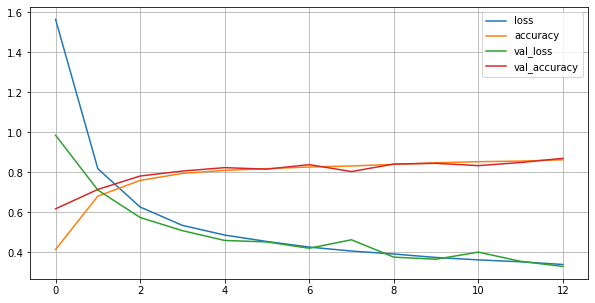

In [23]:
''' plot the history with figsize=(10,5)
    the plot should display the grid and the whole range of values for loss and accuracy '''

pd.DataFrame(baseline_model_history.history).plot(figsize=(10, 5))
plt.grid(True)

> **Note**: After each training session, the model contains some trained weights, so if you want to make changes to your NN and re-run your experiments with a new random initilization of weights, you should re-run the build-model cell to clear and re-initialize the weights randomly, and then compile it again so that you can have a fresh restart of your updated model.

### Building `nn_clf` with 99% Test Accuracy

Now that you have a working `baseline_model` with 85% `val_accuracy`, you should build a NN classifier `nn_clf` that can achieve a **test accuracy** of 99%. You can start with the same architecture of your `baseline_model` and increase the compleixty of `nn_clf` gradually if needed. Recall that some train/test splits are easier for the model to learn from, so if your accuracy is getting so close but not hitting 0.99, you may want to re-split train/test in addition to the changes you may want to make on your model.

> **Note**: Any hint given in this notebook is just a suggestion and may or may not work with your model depending on the configurations of your model, so you should try as many different configurations, techniques, and approaches as necessary.

In [24]:
# build nn_clf
nn_clf = tf.keras.models.Sequential([
  # input layer should include one neuron per input feature
  tf.keras.layers.Dense(X_train.shape[1], activation='relu', input_dim=X_train.shape[1]),
  tf.keras.layers.Dense(100, activation='relu'), # hidden layer with 100 neurons
  tf.keras.layers.Dense(75, activation='relu'), # hidden layer with 75 neurons
  tf.keras.layers.Dense(11, activation='softmax')]) # output layer has 11 neurons for 11 classes, & softmax for multiclass

#nn_clf.summary()

In [25]:
''' Compile nn_clf - metric is 'accuracy' and be careful to choose the loss properly
    Hint1: One of the hyperparameters you can change is the optimizer (Adam, RMSprop, SGD, ...)
    Hint2: The other impactful hyperparameter is learning_rate '''

nn_clf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
''' train nn_clf on X_train, y_train with validation_split=0.1
     Hint: You may use EarlyStopping and set the patience parameter,
     but then you should check in the following cell whether the test accuracy reaches to 0.99,
     and make changes to compile and nn_clf hyperparameters if needed '''

early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

nn_clf_history = nn_clf.fit(X_train, y_train, validation_split=0.1, epochs=100, callbacks=[early_stopping])

Epoch 1/100
1317/1317 [==============================] - 1s 689us/step - loss: 1.3419 - accuracy: 0.5077 - val_loss: 0.5075 - val_accuracy: 0.7979
Epoch 2/100
1317/1317 [==============================] - 1s 626us/step - loss: 0.4793 - accuracy: 0.7974 - val_loss: 0.4104 - val_accuracy: 0.8278
Epoch 3/100
1317/1317 [==============================] - 1s 653us/step - loss: 0.4116 - accuracy: 0.8228 - val_loss: 0.3694 - val_accuracy: 0.8391
Epoch 4/100
1317/1317 [==============================] - 1s 627us/step - loss: 0.3650 - accuracy: 0.8437 - val_loss: 0.2966 - val_accuracy: 0.8735
Epoch 5/100
1317/1317 [==============================] - 1s 636us/step - loss: 0.3133 - accuracy: 0.8674 - val_loss: 0.3109 - val_accuracy: 0.8556
Epoch 6/100
1317/1317 [==============================] - 1s 619us/step - loss: 0.2864 - accuracy: 0.8802 - val_loss: 0.2769 - val_accuracy: 0.8881
Epoch 7/100
1317/1317 [==============================] - 1s 644us/step - loss: 0.2500 - accuracy: 0.9010 - val_loss: 0

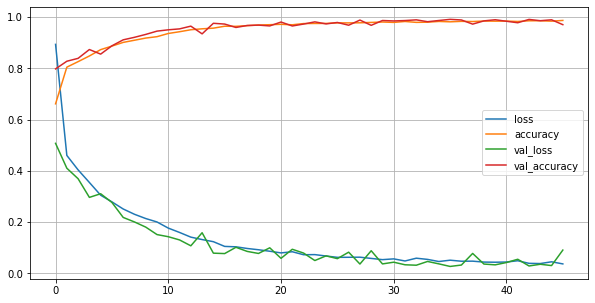

In [27]:
''' plot the history with a figsize of (10,5)
    the plot should display the grid and the whole range of values for loss and accuracy '''

pd.DataFrame(nn_clf_history.history).plot(figsize=(10, 5))
plt.grid(True)

> To evaluate the model, you should use `evaluate()` method on the test set `X_test`.

> <font color='red'>**Test Accuracy Requirement**</font>: Your accuracy on `X_test` should be **0.99** (rounded with two decimal places). Otherwise, your `nn_clf` will get no points for this part, so you should fine-tune the hyperparametrs of your `nn_clf` (number of neurons, hidden layers, etc.) and `compile` (such as optimizer, learning rate, etc.) accordingly.

> **Hint**: Keep in mind that the best model is not always the most complex model, it should best fit with your data. You should start with a simple model as you did with the `baseline_model`, and increase the model complexity (number of neurons and hidden layers) gradually and when/if needed.

> Recall that each time you want to run a new training session by calling `.fit()` method, you should re-run the build `nn_clf` and `compile` cells to re-start with a fresh random initilization of weights.

In [28]:
# Evaluate nn_clf on X_test, y_test
nn_clf_loss, nn_clf_test_accuracy = nn_clf.evaluate(X_test,  y_test, verbose=2)

366/366 - 0s - loss: 0.0318 - accuracy: 0.9907


In [29]:
# Required Test Accuracy: 0.99
round(nn_clf_test_accuracy, 2)

0.99

### Investigating the Impact of Learning Rate on Accuracy

Next, you're going to plot the impact of learning-rate on accuracy specifically. To do so and to avoid repeating the code, you should write a function `build_model`.

In [30]:
def build_model():
    model = tf.keras.Sequential([
      # input layer should include one neuron per input feature
      tf.keras.layers.Dense(X_train.shape[1], activation='relu', input_dim=X_train.shape[1]),
      tf.keras.layers.Dense(100, activation='relu'), # hidden layer with 100 neurons
      tf.keras.layers.Dense(75, activation='relu'), # hidden layer with 75 neurons
      tf.keras.layers.Dense(11, activation='softmax')]) # output layer has 11 neurons for 11 classes, & softmax multiclass
    return model

> The **learning rate range** that you're going to investigate is between [0.001, 0.01] inclusive with an increment step of 0.001. Use the optimizer and other hyperparatmeters of your choice that performed the best in your fine-tuning of `nn_clf` in the previous steps.

In [31]:
# learning_rates range - the for loop of the following experiment will iterate over this array
learning_rates = np.arange(0.001, 0.011, 0.001)

In [32]:
print(type(learning_rates))
learning_rates

<class 'numpy.ndarray'>


array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 ])

> **Note**: For the following experiment, you should compile the model with `accuracy` as the metric, and use the same loss function that was used for `baseline_model` and `nn_clf` in each iteration of the `for` loop.

> Running this cell may take a a long time!

In [35]:
# accuracies list
accuracies = []

''' Write a for loop that iterates over learning_rates array which was defined in the previous cell
    In each iteration:
        build a new model by calling build_model(),
        compile with the optimizer of your choice, and the current learning_rate in this iteration,
        train on X_train and y_train with 20 epochs,
        evaluate the model on X_test, y_test and get the test accuracy,
        append the test accuracy to the accuracies list '''

for learning_rate in learning_rates:
    new_model = build_model()
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
    new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    new_model_history = new_model.fit(X_train, y_train, validation_split=0.1, epochs=20, callbacks=[early_stopping])
    new_model_loss, new_model_test_accuracy = new_model.evaluate(X_test,  y_test, verbose=2)
    accuracies.append(new_model_test_accuracy)

Epoch 1/20
1317/1317 [==============================] - 1s 693us/step - loss: 1.3642 - accuracy: 0.4832 - val_loss: 0.5719 - val_accuracy: 0.7498
Epoch 2/20
1317/1317 [==============================] - 1s 604us/step - loss: 0.4714 - accuracy: 0.8037 - val_loss: 0.5133 - val_accuracy: 0.7652
Epoch 3/20
1317/1317 [==============================] - 1s 589us/step - loss: 0.3906 - accuracy: 0.8344 - val_loss: 0.3399 - val_accuracy: 0.8524
Epoch 4/20
1317/1317 [==============================] - 1s 600us/step - loss: 0.3597 - accuracy: 0.8462 - val_loss: 0.2960 - val_accuracy: 0.8686
Epoch 5/20
1317/1317 [==============================] - 1s 608us/step - loss: 0.3186 - accuracy: 0.8654 - val_loss: 0.3060 - val_accuracy: 0.8639
Epoch 6/20
1317/1317 [==============================] - 1s 595us/step - loss: 0.2983 - accuracy: 0.8735 - val_loss: 0.2568 - val_accuracy: 0.8889
Epoch 7/20
1317/1317 [==============================] - 1s 597us/step - loss: 0.2745 - accuracy: 0.8893 - val_loss: 0.2412 -

1317/1317 [==============================] - 1s 602us/step - loss: 0.1059 - accuracy: 0.9620 - val_loss: 0.1056 - val_accuracy: 0.9611
Epoch 17/20
1317/1317 [==============================] - 1s 596us/step - loss: 0.0944 - accuracy: 0.9660 - val_loss: 0.0806 - val_accuracy: 0.9686
Epoch 18/20
1317/1317 [==============================] - 1s 603us/step - loss: 0.0965 - accuracy: 0.9651 - val_loss: 0.0725 - val_accuracy: 0.9737
Epoch 19/20
1317/1317 [==============================] - 1s 602us/step - loss: 0.0919 - accuracy: 0.9662 - val_loss: 0.3395 - val_accuracy: 0.8840
Epoch 20/20
1317/1317 [==============================] - 1s 600us/step - loss: 0.1030 - accuracy: 0.9609 - val_loss: 0.0702 - val_accuracy: 0.9744
366/366 - 0s - loss: 0.0815 - accuracy: 0.9739
Epoch 1/20
1317/1317 [==============================] - 1s 683us/step - loss: 1.0611 - accuracy: 0.5684 - val_loss: 0.6224 - val_accuracy: 0.7377
Epoch 2/20
1317/1317 [==============================] - 1s 605us/step - loss: 0.4354

1317/1317 [==============================] - 1s 592us/step - loss: 0.1610 - accuracy: 0.9362 - val_loss: 0.1457 - val_accuracy: 0.9464
Epoch 12/20
1317/1317 [==============================] - 1s 587us/step - loss: 0.1315 - accuracy: 0.9516 - val_loss: 0.1192 - val_accuracy: 0.9562
Epoch 13/20
1317/1317 [==============================] - 1s 588us/step - loss: 0.1423 - accuracy: 0.9470 - val_loss: 0.1540 - val_accuracy: 0.9400
Epoch 14/20
1317/1317 [==============================] - 1s 587us/step - loss: 0.1328 - accuracy: 0.9498 - val_loss: 0.0871 - val_accuracy: 0.9652
Epoch 15/20
1317/1317 [==============================] - 1s 584us/step - loss: 0.1248 - accuracy: 0.9526 - val_loss: 0.1187 - val_accuracy: 0.9521
Epoch 16/20
1317/1317 [==============================] - 1s 594us/step - loss: 0.1370 - accuracy: 0.9491 - val_loss: 0.1531 - val_accuracy: 0.9413
Epoch 17/20
1317/1317 [==============================] - 1s 584us/step - loss: 0.0995 - accuracy: 0.9631 - val_loss: 0.1260 - val_

1317/1317 [==============================] - 1s 668us/step - loss: 0.2783 - accuracy: 0.8872 - val_loss: 0.2310 - val_accuracy: 0.9000
Epoch 7/20
1317/1317 [==============================] - 1s 606us/step - loss: 0.2582 - accuracy: 0.8955 - val_loss: 0.1770 - val_accuracy: 0.9272
Epoch 8/20
1317/1317 [==============================] - 1s 607us/step - loss: 0.2321 - accuracy: 0.9068 - val_loss: 0.2211 - val_accuracy: 0.9017
Epoch 9/20
1317/1317 [==============================] - 1s 605us/step - loss: 0.2208 - accuracy: 0.9144 - val_loss: 0.1131 - val_accuracy: 0.9547
Epoch 10/20
1317/1317 [==============================] - 1s 644us/step - loss: 0.2063 - accuracy: 0.9186 - val_loss: 0.1716 - val_accuracy: 0.9295
Epoch 11/20
1317/1317 [==============================] - 1s 609us/step - loss: 0.1771 - accuracy: 0.9307 - val_loss: 0.1720 - val_accuracy: 0.9299
Epoch 12/20
1317/1317 [==============================] - 1s 592us/step - loss: 0.1780 - accuracy: 0.9293 - val_loss: 0.3147 - val_acc

Text(0, 0.5, 'Accuracy')

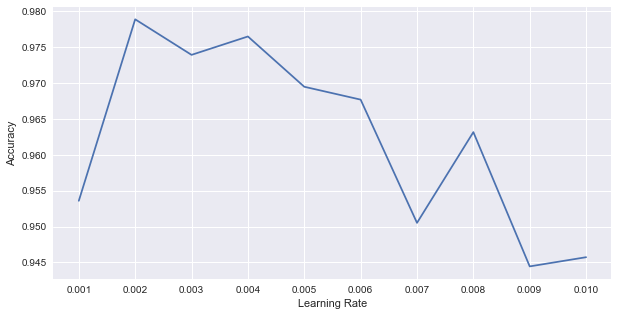

In [36]:
''' Plot the "Impact of Learning Rate on Accuracy" with 'Learning Rate' on x-axis and 'Accuracy' on y_axis
    The plot should use 'seaborn' style and with a figsize=(10, 5) and fontsize=14 for the title/labels
    The plot must have title, axis labels, and xticks precisely as specified and displayed below
    
    The range of your accuracies may slightly differ but should be similar, and
    the range of learning rate should be exactly the same, i.e from 0.001 to 0.01
    
    Incomplete/wrong plots will get no credit '''

plt.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.plot(learning_rates, accuracies)
plt.xticks(learning_rates)
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")

## Part-I - Questions

ANSWER THE FOLLOWING QUESTIONS HERE:

- **Q1 [5 points]** - According to your plot of accuracy vs learning rate, what is a good value for learning rate? **Why**? Mention the reason clearly.
    
    - **Answer:** Good learning rates, according to my plot, are between 0.002 to 0.006. Once you increase the learning rate  higher than that, you start to lose accuracy. Generally, a large learning rate allows the model to learn faster, at the cost of arriving on a sub-optimal final set of weights. The default learning rate for adam optimizer is 0.001.


- **Q2 [5 points]** - Name five learning rate scheduling policies known as **learning schedules** (you may consult with the textbook), and explain each briefly in no more than two sentences here.
    
    - **Power scheduling:** The learning rate decreases slowly over time because it is a function of the iteration number. The initial learning rate η0, the power c (typically set to 1), and the steps s are hyperparameters.
    - **Exponential scheduling:** The learning rate will gradually drop by a constant factor of 10 at every s steps.
    - **Piecewise constant scheduling:** Use a constant learning rate for a number of epochs, then a smaller learning rate for another number of epochs, and so on. Which learning rate and how long to use each learning rate (number of epochs) requires tuning.
    - **Performance scheduling:** Measure the validation error every N steps (just like for early stopping), and reduce the learning rate by a factor of λ when the error stops dropping.
    - **1cycle scheduling:** Starts with an initial learning rate η0, growing the learning rate linearly up to η1 halfway through training, then linearly decreasing back to η0 during the second half of training. The maximum learning rate η1 is chosen using the same approach we used to find the optimal learning rate, and the initial learning rate η0 is chosen to be roughly 10 times lower.

## Part-II - Regression Using NNs

In Part-II, you're going to perform a regression task using NN that you build in Tensorflow/Keras framework.

Download the ["Video Game Sales with Ratings"](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings) dataset and read the descriptions on the Kaggle page. You are going to build and train a regression NN to predict **`NA_Sales`**.

In [37]:
# Load the 'Video_Games_Sales_as_at_22_Dec_2016.csv' as a dataframe using pandas
data2 = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
print(data2.shape)
data2.head()

(16719, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Preprocessing

Follow the multiple steps of preprocessing very carefully.

**NOTE**: If you do not perform the preprocessing steps correctly, all of your results would be wrong and your Part-II will get zero points.

> As usual, check if there is any NAs (there are plenty) and drop them.

In [38]:
# check NAs
data2.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [39]:
# Drop NAs
data2.dropna(inplace=True)
print(data2.shape)
data2.head()

(6825, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [40]:
# check NAs again
data2.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

> Since there were a lot of NAs, you've missed a lot of indexes of the dropped rows after dropping NAs, so you should use [`reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) but no new column should be added as `index`, so you should set the `drop` parameter of `reset_index()` to `True`.

In [41]:
# Reset index so that the rows are indexed from 0 and increment by one, no column should be added!
data2.reset_index(drop=True, inplace=True)
print(data2.shape)
data2.head()

(6825, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [42]:
# Drop "Name" column as it does not provide useful info for your model training
data2.drop(columns=['Name'], inplace=True)
print(data2.shape)
data2.head()

(6825, 15)


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
3,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


> `NA_Sales` is the target column for prediction; however, since the column `Global_Sales` is the sum of other sales, you should drop it; otherwise, it corrupts the training process by leaking information and violating the regression assumption that features are independent.

> **NOTE**: Make sure to match your `data2` dataframe with the provided outputs after every step.

In [43]:
# Drop "Global_Sales" column
data2.drop(columns=['Global_Sales'], inplace=True)
print(data2.shape)
data2.head()

(6825, 14)


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8,322.0,Nintendo,E
1,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,80.0,73.0,8,192.0,Nintendo,E
3,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,58.0,41.0,6.6,129.0,Nintendo,E


> Next, check the statistical description of `NA_Sales`.

In [44]:
data2['NA_Sales'].describe()

count    6825.000000
mean        0.394484
std         0.967385
min         0.000000
25%         0.060000
50%         0.150000
75%         0.390000
max        41.360000
Name: NA_Sales, dtype: float64

In [45]:
# Find correlations with NA_Sales
correlations = data2.corr()["NA_Sales"].sort_values()
correlations

Year_of_Release   -0.016239
Critic_Score       0.233580
User_Count         0.246208
Critic_Count       0.283917
JP_Sales           0.468607
Other_Sales        0.726757
EU_Sales           0.841808
NA_Sales           1.000000
Name: NA_Sales, dtype: float64

> Separate features from the target column, so `X2` should contain all columns except `NA_Sales`. `y2` should contain `NA_Sales` only. `X2` and `y2` are so named to differentiate them from the features and labels of Part-I.

In [46]:
# Get feature vector X2 (all columns but "NA_Sales") and target label y2 as "NA_Sales"
X2 = data2.loc[:, data2.columns != 'NA_Sales']
y2 = data2['NA_Sales']

In [47]:
# Print X2 shape and head
print(X2.shape)
X2.head()

(6825, 13)


,Platform,Year_of_Release,Genre,Publisher,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,28.96,3.77,8.45,76.0,51.0,8,322.0,Nintendo,E
1,Wii,2008.0,Racing,Nintendo,12.76,3.79,3.29,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii,2009.0,Sports,Nintendo,10.93,3.28,2.95,80.0,73.0,8,192.0,Nintendo,E
3,DS,2006.0,Platform,Nintendo,9.14,6.50,2.88,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii,2006.0,Misc,Nintendo,9.18,2.93,2.84,58.0,41.0,6.6,129.0,Nintendo,E


In [48]:
# Print y2 shape and head
print(y2.shape)
y2.head()

(6825,)


0    41.36
1    15.68
2    15.61
3    11.28
4    13.96
Name: NA_Sales, dtype: float64

In [49]:
X2.dtypes

Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

> You should convert `object` (categorical) features using [`get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html). This will increase the number of features to **1683** by one-hot encoding. You can simply call `get_dummies()` on `X2` directly, and it will detect the `object` features and one-hot encode them automatically.

In [50]:
# Using pandas.get_dummies() create dummy variables for categorical features (needs 1 line of code only)
X2 = pd.get_dummies(X2)
print(X2.shape)
X2.head()

(6825, 1683)


,Year_of_Release,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count,Platform_3DS,Platform_DC,Platform_DS,...,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,2006.0,28.96,3.77,8.45,76.0,51.0,322.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2008.0,12.76,3.79,3.29,82.0,73.0,709.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2009.0,10.93,3.28,2.95,80.0,73.0,192.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2006.0,9.14,6.50,2.88,89.0,65.0,431.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2006.0,9.18,2.93,2.84,58.0,41.0,129.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [51]:
# Normalize X2 using X2.mean() and X2.std()  NOTE: The output is provided for your reference
# needs 1 line of code only
X2 = (X2-X2.mean())/X2.std()
print(X2.shape)
X2.head()

(6825, 1683)


,Year_of_Release,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count,Platform_3DS,Platform_DC,Platform_DS,...,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,-0.341176,41.790569,12.886767,31.004904,0.413014,1.147975,0.250716,-0.15243,-0.045334,-0.270063,...,-0.012105,-0.01712,-0.012105,-0.012105,1.509226,-0.397162,-0.012105,-0.515485,-0.012105,-0.730971
1,0.133743,18.221103,12.956315,11.884655,0.845647,2.292368,0.909519,-0.15243,-0.045334,-0.270063,...,-0.012105,-0.01712,-0.012105,-0.012105,1.509226,-0.397162,-0.012105,-0.515485,-0.012105,-0.730971
2,0.371202,15.558627,11.182831,10.624793,0.701436,2.292368,0.029412,-0.15243,-0.045334,-0.270063,...,-0.012105,-0.01712,-0.012105,-0.012105,1.509226,-0.397162,-0.012105,-0.515485,-0.012105,-0.730971
3,-0.341176,12.954346,22.380122,10.365410,1.350385,1.876225,0.436270,-0.15243,-0.045334,3.702302,...,-0.012105,-0.01712,-0.012105,-0.012105,1.509226,-0.397162,-0.012105,-0.515485,-0.012105,-0.730971
4,-0.341176,13.012543,9.965734,10.217191,-0.884885,0.627797,-0.077835,-0.15243,-0.045334,-0.270063,...,-0.012105,-0.01712,-0.012105,-0.012105,1.509226,-0.397162,-0.012105,-0.515485,-0.012105,-0.730971


In [52]:
# Split the data to train and test with ratio of 80/20 for train/test respectively
# NOTE: Make sure to split X2 and y2, NOT X and y!
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=1)
print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(5460, 1683)
(5460,)
(1365, 1683)
(1365,)


### Building NN for Regression

Now, build a sequential NN model `nn_reg` with proper configurations for the regression task.

> **Hints**:
> - `input_dim` of the first layer should match with the number of features in `X2`

> - ReLU is usually a good activation function for the hidden layers, but you may also try other activation functions and/or initialization strategies.

> - Note that the activation function and number of neurons in the output layer are determined by the type of ML task i.e. Regression.

> - The common loss functions for regression are `mae` and `mse` and the metric is usually the same as loss for regression. To keep the results consistent with the requirements, you should use `mae` as the loss function, and the metric would also be `mae`.

> - You're going to use callback and early stopping to determine the optimal number of epochs.

> <font color='red'>**Test MAE Loss Requirement**</font>: Your `nn_reg` model's `mae` loss on `X2_test` should not exceed **0.20**, i.e. the test `mae` loss should be 0.20 or lower. Otherwise, your `nn_reg` will get zero points for this part, so you must fine-tune your `nn_reg` and `compile` accordingly.

In [53]:
''' Build nn_reg with appropriate layers for regression

    Hint1: input_dim of the first layer should match with the number of features in X2
    
    Hint2: The activation function and number of neurons in the output layer are determined
    by the type of ML task i.e. Regression
    
    Hint3: If you observed overfitting in the history plot,
    consider using regularization techniques such as Dropout, and/or Batch Normalization '''

nn_reg = keras.models.Sequential([
    # input layer should include one neuron per input feature
    keras.layers.Dense(X2_train.shape[1], activation="relu", input_dim=X2_train.shape[1]),
    keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    keras.layers.Dense(1) # output layer with 1 neuron and with None activation function because it's regression
])

In [54]:
# Create an optimizer of your choice and set its learning_rate (you may need to tune it)
optimizer = keras.optimizers.Adam(learning_rate=0.003)

> Next, you're going to create `callbacks` and `EarlyStopping`.

> **Note:** The `patience` parameter is the number of epochs to monitor for improvement in `EarlyStopping`.

In [55]:
''' Create a callback with EarlyStopping and,
    monitor='val_loss',  patience=10 and restore_best_weights=True '''
early_stopping_reg = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [56]:
''' Compile nn_reg with loss='mae', optimizer=optimizer and metrics=['mae'] '''

nn_reg.compile(loss='mae', optimizer=optimizer, metrics=['mae'])

> Now run the training, sit back and let tf/keras determine the optimal number of epochs! Although the `EPOCHS` is set to 200, the training would usually stop sooner with `EarlyStopping`. You may change/increase `EPOCHS` and/or any other `compile` or `nn_reg` hyperparameter that is necessary to achieve the required test `mae` loss, i.e. 0.2 and less.

In [57]:
EPOCHS = 200
''' Fit nn_reg on X2_train, y2_train, and with epochs=EPOCHS, callbacks=[early_stopping_reg], and
    validation_split=0.1 '''

nn_reg_history = nn_reg.fit(X2_train, y2_train, epochs=EPOCHS, callbacks=[early_stopping_reg], validation_split=0.1)

Epoch 1/200
154/154 [==============================] - 3s 13ms/step - loss: 0.8339 - mae: 0.8339 - val_loss: 0.3436 - val_mae: 0.3436
Epoch 2/200
154/154 [==============================] - 2s 12ms/step - loss: 0.3710 - mae: 0.3710 - val_loss: 0.2758 - val_mae: 0.2758
Epoch 3/200
154/154 [==============================] - 2s 12ms/step - loss: 0.2925 - mae: 0.2925 - val_loss: 0.2378 - val_mae: 0.2378
Epoch 4/200
154/154 [==============================] - 2s 11ms/step - loss: 0.2562 - mae: 0.2562 - val_loss: 0.2386 - val_mae: 0.2386
Epoch 5/200
154/154 [==============================] - 2s 12ms/step - loss: 0.2495 - mae: 0.2495 - val_loss: 0.2333 - val_mae: 0.2333
Epoch 6/200
154/154 [==============================] - 2s 12ms/step - loss: 0.2486 - mae: 0.2486 - val_loss: 0.2270 - val_mae: 0.2270
Epoch 7/200
154/154 [==============================] - 2s 12ms/step - loss: 0.2439 - mae: 0.2439 - val_loss: 0.2341 - val_mae: 0.2341
Epoch 8/200
154/154 [==============================] - 2s 11ms

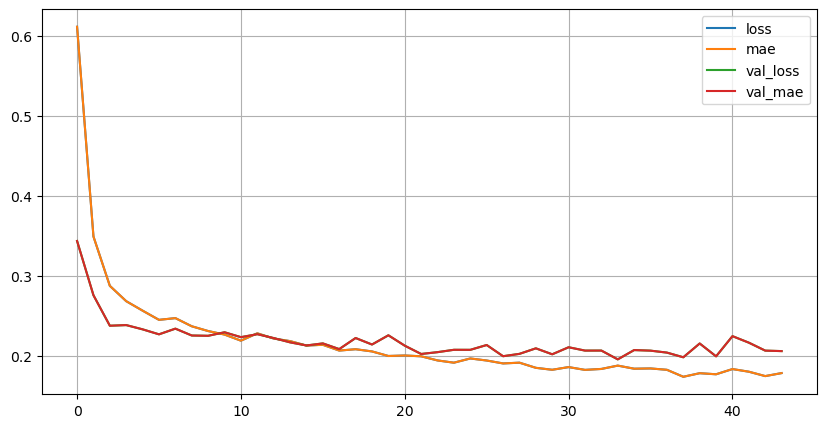

In [58]:
''' plot the history with a figsize of (10,5)
    the plot style should be reset back to 'default'
    the plot should display the grid and the whole range of values for loss and mae '''

plt.style.use('default')
pd.DataFrame(nn_reg_history.history).plot(figsize=(10, 5))
plt.grid(True)

In [59]:
# Evaluate nn_reg on X2_test, y2_test
reg_loss, reg_mae = nn_reg.evaluate(X2_test,  y2_test)

43/43 [==============================] - 0s 3ms/step - loss: 0.1926 - mae: 0.1926


In [60]:
''' Maximum reg_loss: 0.20 
    if reg_loss is higher than 0.2, you should rebuild your nn_reg with new hyperparameters and retrain it '''
round(reg_loss, 2)

0.19

### Tips To Overcome Overfitting

As you can see in the provided `nn_reg_history` plot, it seems there is no overfitting because `mae` and `val_mae` are decreasing hand-in-hand. That's because regularization techniques have been used in building `nn_reg`, so you should probably use those techniques too, although the beauty of the NNs is that they are so flexible and there might be multiple solutions/architectures that work for a given problem.

The following plot shows the history of training the same arhcitecture used for `nn_reg` but without regularization techniques. As the plot displays, there is a large gap between `mae` and `val_mae` (like a crocodile opening its mouth to hunt you!!) which clearly indicates **overfitting**.

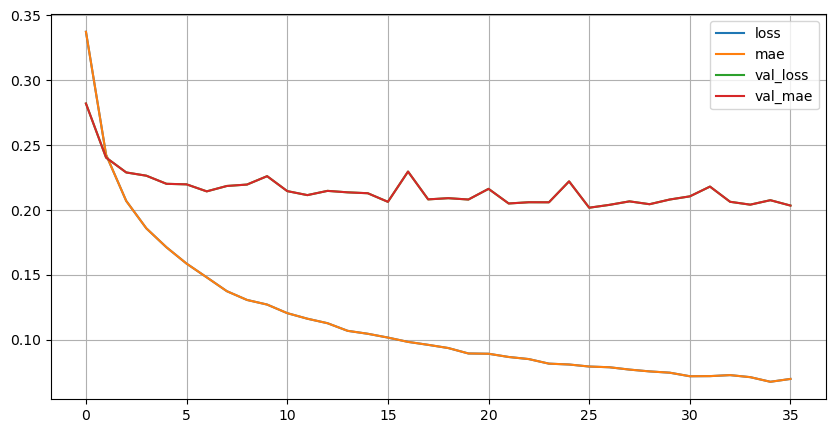

In [84]:
''' Do NOT write anything here!
     This is just to display the overfitting plot '''

> NNs are so prone to overfitting because they have lots of trainable parameters and hence a large degree of freedom which makes them have a high variance.

> As discussed in the lectures, there are various regularization techniques to tackle overfitting in NNs and DNNs. You've already used one regularization technique so far in training `nn_reg` and that was `EarlyStopping`. However, if you notice in your history plot that your model has run into overfitting, consider using other techniques, such as `l2`, `Dropout` and `BatchNormalization`. Recall that although `BatchNormalization` was intended to help with unstable gradients problem, it has regularization effects too.

> If you want to use both `Dropout` and `BatchNormalization`, it's easier to use them in the order as in the following cell, i.e. first the dense layer with activation function followed by batch norm followed by dropout, although as discussed in the lectures, BN can be applied before the activation function too. You should certainly fine-tune the probability of `Dropout` as needed.

In [ ]:
 ''' Do NOT write anything here!
     This is just to display the BN and dropout '''
    ...
    tf.keras.layers.Dense(10, activation = "relu"), # this is just an example, your dense layers might differ
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2), # dropout probability = 0.2 which may be tuned
    ...

## Part-II - Questions

ANSWER THE FOLLOWING QUESTIONS HERE:

**Q3 [5 points]** <br>
(**a - 3 points**) - Using early stopping and callbacks, how may epochs did the training run for `nn_reg`? Find the attribute in `nn_reg_history` object that logs the number of epochs. Write the code to get number of epochs in the following cell.


In [63]:
''' Get the number of epochs from nn_reg_history object
    Hint: it would return a list like below; for you it might be a different number,
    dependeing on when EarlyStopping stopped training '''
print(nn_reg_history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]


(**b - 2 points**) - How did the training of `nn_reg` stop? Your answer should exactly mention the criteria for when the training stops given the specifications. EXPLAIN CLEARLY AND COMPLETELY IN NO MORE THAN TWO SENTENCES!

**Answer:** My early stopping callback monitored val_loss with a patience of 10. If the model's val_loss did not improve/decrease withing 10 epochs, then the training was stopped.

**Q4 [5 points]** - On the history plot of `nn_reg`, you have four colors displayed in the legend, but you can see only two of them (only the orange and red curves are displayed). Explain why?

**Answer:** This is due to our DNN using Mean Absolute Error (mae) for loss function and metrics. So intuitively, the curves for mae and loss would be the same. If you change the loss function to mse and keep metrics as mae, then you will see four curves.

## Grading

Assignment-4 has a maximum of 100 points. Make sure that you get the correct outputs/plots for all cells that you implement and give complete answers to all questions. Also, your notebook should be written with no grammatical and spelling errors and should be easy-to-read.

The breakdown of the 100 points is as follows:

- Part-I Multi-Class Classification: [total 50 points]
    - Implementation of `baseline_model`: 10 points - **val_accuracy Requirement**: 0.85 after the last epoch otherwise zero points
    - Implementation of `nn_clf`: 10 points - **Test Accuracy Requirement**: accuracy on `X_test` should be 0.99 otherwise zero points
    - Accuracy vs Learning Rate plot: 20 points - Incomplete/wrong plots get zero points
    - Questions: 10 points (5 points each)


- Part-II Regression on `NA_Sales`: [total 50 points]
    - Implementation of nn_reg: 40 points - **Test MAE Loss Requirement**: 0.20 for `mae` loss on `X2_test` otherwise zero points 
    - Questions: 10 points (5 points each)
   

<b>Note: </b>Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical, spelling or formatting issues.

Name your notebook ```Lastname-A4.ipynb```. Submit the completed notebook using the ```Assignment-4``` link on Blackboard.

Grading will be based on 

  * correct implementation and results
  * correct answer to the questions
  * complete running of all required cells
  * readability of the notebook
  
<font color=red><b>Due Date: Tuesday May 4th, 11:59PM.</b></font>